In [224]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [279]:
#Parámetros de integración

#Condiciones inciales
y0=np.array([1,0]) 

#Tiempo inicial, final y tamaño de paso
t_ini=0
t_end=10000
h=0.1

#Vector de tiempo
time=[]
for i in np.arange(t_ini,t_end,h):
    time.append(i)
time=np.array(time)

#Función de fuerza
def func(t,y):
    x=y[0]
    vx=y[1]
    return np.array([vx,-x])

# Euler

In [280]:
#Rutina principal
def euler(func,t,y):
    x=y[0]
    vx=y[1]
    y_actual=np.zeros(len(y))
    for i in range(0,len(y)):
        value=y[i]+h*func(t,y)[i]
        y_actual[i]=value
        
    return y_actual


In [281]:
#Solución Euler
sol_euler=np.zeros((len(time),2)) 
sol_euler[0][0]=y0[0]
sol_euler[0][1]=y0[1]

for i in range(1,len(time)): #La condición inicial no se involucra
    sol_euler[i][0]=euler(func,time[i-1],sol_euler[i-1])[0]
    sol_euler[i][1]=euler(func,time[i-1],sol_euler[i-1])[1]
    
#print(sol_euler)

# Runge-Kutta 4

In [282]:
#Rutina principal
def rk4(func,t,y):
    #Notar que dada k es un vector de 2 entradas
    k1=func(t,y)
    k2=func(t+0.5*h , y+0.5*h*k1)
    k3=func(t+0.5*h , y+0.5*h*k2)
    k4=func(t+h,y+h*k3)
    
    y_actual=np.zeros(len(y))
    for i in range(0,len(y)):
        #Calcula cada elemento del vector de estado en el tiempo t+h
        value=y[i]+h/6*(k1[i]+2*k2[i]+2*k3[i]+k4[i])
        y_actual[i]=value
        
    return y_actual #El retorno es el vector y=y(t+h)

In [283]:
#Solución rk4
sol_rk4=np.zeros((len(time),2)) 
sol_rk4[0][0]=y0[0]
sol_rk4[0][1]=y0[1]

for i in range(1,len(time)): #La condición inicial no se involucra
    sol_rk4[i][0]=rk4_vec(func,time[i-1],sol_rk4[i-1])[0]
    sol_rk4[i][1]=rk4_vec(func,time[i-1],sol_rk4[i-1])[1]
    
#print(sol_rk4)

# Graficación

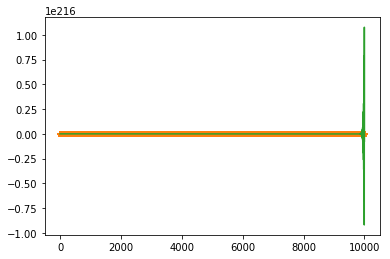

In [284]:

fig=plt.figure()
ax=plt.axes()
ax=plt.plot(t_array,x_t(t_array),'.',label='analytical')
ax=plt.plot(time,sol_rk4[:,0:1],'*',label='numerical my rk4')
ax=plt.plot(time,sol_euler[:,0:1],'-',label='numerical my euler')


# Calculando cantidades conservadas

$$E=\frac{1}{2}(v_x^2+x^2)$$

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2508: RuntimeWarning: overflow encountered in double_scalars
  x1t += delta


Text(0.5,0,'time')

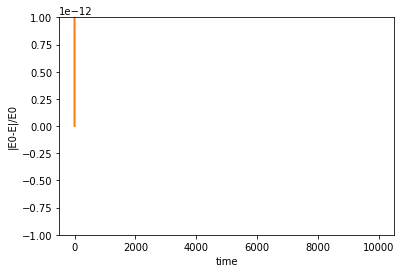

In [285]:
def Delta_energy(y):
    Eini=0.5*((y[0][1]**2+y[0][0]**2))
    value=np.zeros(y.shape[0])
    for i in range(0,y.shape[0]):
        E=0.5*(y[i][1]**2+y[i][0]**2)
        value[i]=abs(E-Eini)/Eini
    return value

fig=plt.figure()
ax=plt.axes()
ax.plot(time,Delta_energy(sol_rk4))
ax.plot(time,Delta_energy(sol_euler))
ax.set_ylabel("|E0-E|/E0")
ax.set_xlabel("time")


# Leapfrog

In [286]:
#Define función F(x)
def F(x):
    value=-x
    return value

#Rutina principal
def leapfrog(F,t,y):
    x=y[0]
    v=y[1]
    v_half=v+0.5*h*F(x)
    x_next=x+h*v_half
    v_next=v_half+0.5*h*F(x_next)
    return np.array([x_next,v_next])
    
    

In [287]:
#Solución leapfrog
sol_leapfrog=np.zeros((len(time),2)) 
sol_leapfrog[0][0]=y0[0]
sol_leapfrog[0][1]=y0[1]

for i in range(1,len(time)): #La condición inicial no se involucra
    sol_leapfrog[i][0]=leapfrog(F,time[i-1],sol_leapfrog[i-1])[0]
    sol_leapfrog[i][1]=leapfrog(F,time[i-1],sol_leapfrog[i-1])[1]
    
#print(sol_leapfrog)

# Graficación

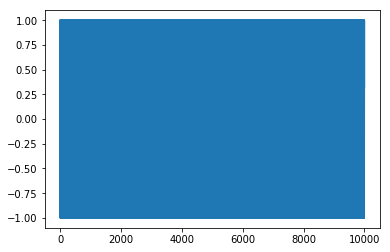

In [288]:
fig=plt.figure()
ax=plt.axes()
ax.plot(time,sol_leapfrog[:,0:1])

# Calculando cantidades conservadas

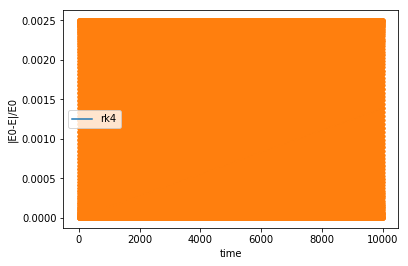

In [292]:
fig=plt.figure()
ax=plt.axes()
ax.plot(time,Delta_energy(sol_rk4),label='rk4')
#ax.plot(time,Delta_energy(sol_euler))
ax.plot(time,Delta_energy(sol_leapfrog),'.')
ax.set_ylabel("|E0-E|/E0")
ax.set_xlabel("time")
ax.legend()